
# A Stylometric & Etymological Comparison of Philip K. Dick & H.G. Wells.
### Samson S. Knight
##### 8/19/2019


Introduction to Computational Literary Analysis

UC-Berkeley, Summer 2019

Instructor: Jonathan Reeve

In [33]:
import spacy
import nltk
import sqlite3
import requests
import json
import random
import pandas as pd
import matplotlib.pyplot as plt
from iteration_utilities import flatten
import sklearn 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import macroetym
from macroetym.main import Text
from PIL import Image


In [3]:
nltk.download('book')

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Sam\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\Sam\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\Sam\AppData\Roaming\nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Sam\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     C:\Users\Sam\AppData\Roaming\nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     C:\Users\Sam\AppData\Roaming\nltk_

True

In [4]:
baseURL = "http://corpus-db.org"

In [5]:
def getTextAndMeta(author): 
    metaResponse = requests.get(baseURL+"/api/author/"+author)
    textResponse = requests.get(baseURL+"/api/author/"+author+"/fulltext")
    meta = json.loads(metaResponse.text)
    texts = json.loads(textResponse.text)
    return meta, texts

In [6]:
wells_meta, wells_texts = getTextAndMeta("Wells, H. G. (Herbert George)")
dick_meta, dick_texts = getTextAndMeta("Dick, Philip K.")
all_text = (wells_texts + dick_texts)
all_meta = (wells_meta + dick_meta)

# Why These Authors?
### A short history and explanation


As a lifelong fan of the science fiction, I have always been interested in the wide range of subjects and themes that the genre explores. However, because of the relatively wide definition of what makes a work "sci-fi", there can be a large disparity between the themes and subjects that two different authors choose to explore. In addition to these broad literary differences between writers, there is also a large geographical component between the texts of British and American science fiction. Starting in England in 1818 with Mary Shelley's landmark work, *Frankenstein; or, The Modern Prometheus*, science fiction was historically an extremeley European centric genre, dominated by famous European authors such as H.G. Wells, Jules Verne, and Hugo Gernsback. 

However, with the rise of pulp fiction and radio broadcasting in the early 20th century, American science fiction began to explode in popularity. Though a Luxembourgish writer, Hugo Gernsback can be thought as the progenitor of the science fiction in the U.S. Emigrating to the U.S. in 1904, Gernsback helped the popularity of American science fiction by grafting it to the American popular consciousness with his infectious radio broadcasts and short stories. However, though pulp science fiction greatly popularized the genre in America, most of the works are highly derivative and have little impact on the genre individually. Though paradoxically, the macro-effects of the works within the American pulp science fiction genre have been highly influential on American pop culture at large, leading to the rise of sci-fi in popular media in the 60s and 70s (such as *Star Trek*, and later *Star Wars*). 

As an author, Philip K. Dick has always been of great interest to me not only because of his riveting and thought provoking novels, but also because of the time period in which he wrote. Beginning his career in the declining pulp sci-fi industry of the 50s, Dick struggled for his first two decades as a writer to get his short stories published until his breakthrough success with *The Man in High Castle* (recently adapated by Amazon Video) in 1962, which won him a Hugo award (a prestigous sci-fi award named after Hugo Gernsback). As a man who had struggled with depression, amphetamine addiction, and other mental health issues, the gritty themes that Dick explores in his novels sets him far apart from other sci-fi writers emerging out of the confines of the American pulp genre in the 60s. Philosophical, dark, and depressing, the dystopian subjects and paranormal motifs of Dick represent the true beauty of the science fiction to explore questions in society and technology's role therein. 

Whileas Philip K. Dick represents the beginning of a new chapter in American sci-fi, I think the same can be said for the writings of H.G. Wells who helped solidify the genre's origins in the latter half of the 19th century along other writers like Jules Verne. However, for my project I chose to use Wells over Verne as an older European contrast to the writings of Dick since he wrote in English (as opposed to French for Verne) and had more futurist & philosophical themes in his writings (as opposed to the more fanciful writings of Verne).

In [7]:
# Finding the number of Wells' Texts and the # of Dick's texts
len(wells_meta), len(wells_texts), len(dick_meta), len(dick_texts), len(all_text), len(all_meta)

(66, 63, 13, 13, 76, 79)

In [24]:
wells_texts = wells_texts[0:3]
wells_meta = wells_meta[0:3]
len(wells_texts)

3

# Refining Corpus Size

Due to the size of Wells' corpus compared to Dick's, I had to massively cut down on the number of novels present within Wells' corpus. Additionally, as a futurist and both a polymath and a polyglot, Wells' wrote frequently wrote on subjects outside of science fiction and his native language of English. Fortunately however, Wells' corpus came presorted by popularity (total downloads), thus here I am simply taking his three most popular works. Unfortunately though, there is an unescapable bias in comparing these two corpora (apart from the time and geographical distances that this project is meant to explore); Dick's corpus is made entirely of his short stories (because his novels are recent enough to maintain copyright) whileas Wells' corpus is composed entirely of novels.

In [9]:
# Tokenizing both Sets for Later
dick_tokens = []
for ele in dick_texts:
    dick_tokens.append(nltk.word_tokenize(ele["text"]))

    
wells_tokens = []
for ele in wells_texts:
    wells_tokens.append(nltk.word_tokenize(ele["text"]))
    


In [10]:
dick_token_count = []
for ele in dick_tokens:
    dick_token_count.append(len(ele))
    
dick_titles = []
for ele in dick_meta:
    dick_titles.append(ele["title"])

# Word Length of each of Dick's Works, displayed as tuples.
x = tuple((zip(dick_titles, dick_token_count)))
x

(('Beyond Lies the Wub', 3730),
 ('Beyond the Door', 3189),
 ('The Crystal Crypt', 9679),
 ('The Defenders', 11049),
 ('The Gun', 6470),
 ('The Skull', 10334),
 ('The Eyes Have It', 1378),
 ('Second Variety', 20517),
 ('The Variable Man', 31853),
 ('Mr. Spaceship', 14054),
 ('Piper in the Woods', 9587),
 ('Tony and the Beetles', 6224),
 ('The Hanging Stranger', 6847))

In [11]:
wells_token_count = []
for ele in wells_tokens:
    wells_token_count.append(len(ele))
    
wells_titles = []
for ele in wells_meta:
    wells_titles.append(ele["title"])
    
# Word Length of each of Well's Works, displayed as tuples
x = tuple((zip(wells_titles, wells_token_count)))
x

(('The Time Machine', 37388),
 ('The War of the Worlds', 69454),
 ('The Island of Doctor Moreau', 52105))

In [12]:
total_dick_tokens = list(flatten(dick_tokens))
total_wells_tokens = list(flatten(wells_tokens))
size_ratio = (len(total_wells_tokens)/len(total_dick_tokens))
print("There are about {} words in Wells' corpora for every 1 word in Dicks corpora".format(size_ratio))

There are about 1.1781618993262224 words in Wells' corpora for every 1 word in Dicks corpora


In [13]:
def typeTokenRatio(tokens): 
    numTypes = len(set(tokens))
    numTokens = len(tokens)
    the_ratio = numTypes/numTokens
    print(the_ratio)
    

# Dick's type-token ratio across entire Corpora
dick_ratio = typeTokenRatio(total_dick_tokens)

#Well's type-token ratio across entire Corpora
wells_ratio = typeTokenRatio(total_wells_tokens)

0.06231515591760494
0.07415679440316583


# Type-Token Comparison

I find it interesting how Wells and Dick have about the same type-token ratio. When I had originally compiled my Corpora, Wells had about half the type-token ratio, yet nearly 50 times as many tokens. Yet after I reduced Wells' corpus to a relatively even token ratio (1.17) by taking only his first 3 novels, the type-token ratio within the corpus surged to slightly higher than Dick's corpus ratio. Thus, even though the type-token ratio within Dick's corpus is slightly lower, I think this can be attributed to the type differences between these two corpuses.

*The Time Machine*, *The War of the Worlds*, and *The Island of Doctor Moreau* are all novels, while as Dick's corpus is made entirely of short stories. I think that the structure of short stories leads to a much smaller cast of characters and places compared to novels, which frequently feature "ensemble casts" and also a wider spectrum of places that an individual character can visit or interact with due to the larger length. Thus, I think it is safe to say that the difference between these two type-token ratios are "statistically insignificant."

In [14]:
dick_raw = []
for ele in dick_texts:
    dick_raw.append(ele["text"])

In [15]:
wells_raw = []
for ele in wells_texts:
    wells_raw.append(ele["text"])


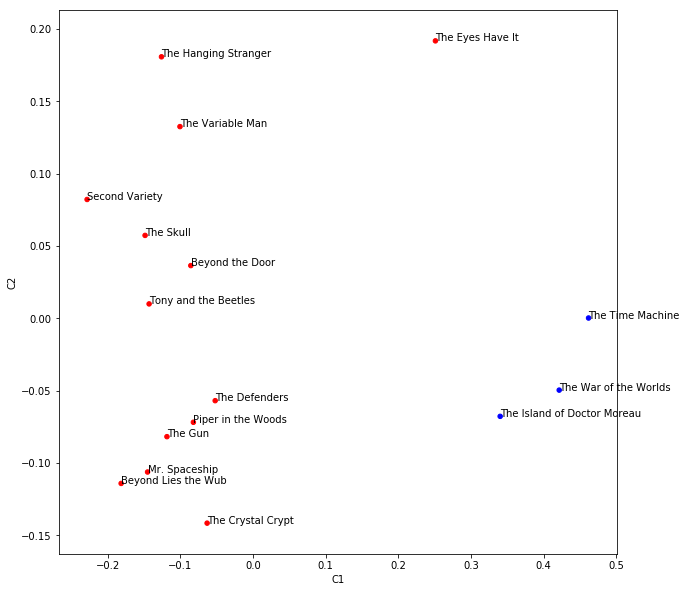

In [31]:
tfidf = TfidfVectorizer(tokenizer=nltk.word_tokenize, max_features=400)

tfMatrix = tfidf.fit_transform(dick_raw+wells_raw)

pca = PCA(n_components=2)
pcaOut = pca.fit_transform(tfMatrix.todense())
df = pd.DataFrame(pcaOut, index=dick_titles + wells_titles, 
                  columns=['C1', 'C2'])

ax = df.plot(x='C1', y='C2', kind='scatter', figsize=(10,10), c=list('r'*13 + 'b'*3))
for key, value in df.iterrows():
    ax.annotate(key, value)

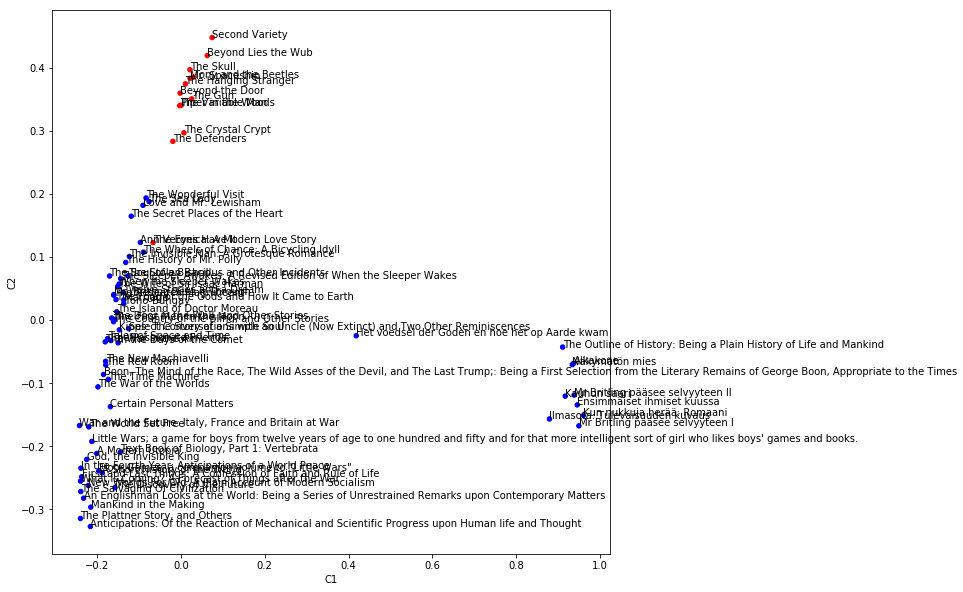

In [36]:
Image.open("originalstylo.png")

# A Comparison of Two Stylometric Analyses
After performing stylometry on my corpora of famous science fiction writers (Philip K. Dick and H.G. Wells) using PCA, I attained the above results. Though expected, I was surprised at the stark contrast between the two authors when divided and color coded by the two sets of corpora. 

However, there is a single outlier among Dick's corpus that stands relatively isolated to the rest, that being his 1953 short story, "The Eyes Have it". The shortest of Dick's short stories within his corpus (at only around 1300 tokens) "The Eyes Have it" describes a confused man who had missed the alien invasion of earth. Thus, to see how this outlier fits into Wells' corpus at large, I have included an additional stylometric analysis of the two complete corpora. The above results are very interesting, as the stark contrast between the two corpora stays relatively visible, with the exception of "The Eyes Have It" which is firmly within the grouping of Wells' works. Additionally, one can see why it was necessary to purge many of Wells' non-English and non-sci-fi works by looking at Well's secondary grouping of historical and Finnish works.

I think "The Eyes Have It", outlier is due to two reasons. Firstly, the book is one of Dick's first works and is firmly situated with the more classically influence pulp sci-fi genre, dealing with the subject of an alien invasion which is very thematically similar to the subject of arguably Wells' most popular novel, *The War of the Worlds*. Secondly, "The Eyes Have it" is by far the smallest text within both corpora, being less than half of the size of Dick's shorter short stories, so this outlier might simply be a statistical anomaly due to the bias of a small token size.



In [18]:
wells_sum = []
for ele in wells_raw:
    wells_sum.append(ele)

In [19]:
wells_etym = Text(wells_sum[0])
wells_stats = wells_etym.familyStats()
wells_stats

{'Latinate': 57.649984695439244,
 'Germanic': 40.86394245485154,
 'Other': 0.13774104683195593,
 'Semitic': 0.3290480563207836,
 'Austronesian': 0.04591368227731864,
 'Hellenic': 0.889194980104071,
 'Indo-Iranian': 0.015304560759106214,
 'Celtic': 0.06887052341597798,
 'Turkic': 0.0,
 'Balto-Slavic': 0.0,
 'Uralic': 0.0,
 'Japonic': 0.0}

In [20]:
dick_sum = []
for ele in dick_raw:
    dick_sum.append(ele)


In [21]:
dick_etym = Text(dick_sum[0])
dick_stats = dick_etym.familyStats()
dick_stats

{'Germanic': 55.027173913043484,
 'Latinate': 42.98007246376811,
 'Turkic': 0.2717391304347826,
 'Semitic': 0.4076086956521739,
 'Other': 0.4076086956521739,
 'Hellenic': 0.8152173913043478,
 'Indo-Iranian': 0.09057971014492752,
 'Celtic': 0.0,
 'Austronesian': 0.0,
 'Balto-Slavic': 0.0,
 'Uralic': 0.0,
 'Japonic': 0.0}

In [22]:
labels = ["Philip K. Dick", "H.G. Wells"]
all_stats = [dick_stats, wells_stats]
df = pd.DataFrame(all_stats, index=labels)
df

,Austronesian,Balto-Slavic,Celtic,Germanic,Hellenic,Indo-Iranian,Japonic,Latinate,Other,Semitic,Turkic,Uralic
Philip K. Dick,0.000000,0.0,0.000000,55.027174,0.815217,0.090580,0.0,42.980072,0.407609,0.407609,0.271739,0.0
H.G. Wells,0.045914,0.0,0.068871,40.863942,0.889195,0.015305,0.0,57.649985,0.137741,0.329048,0.000000,0.0


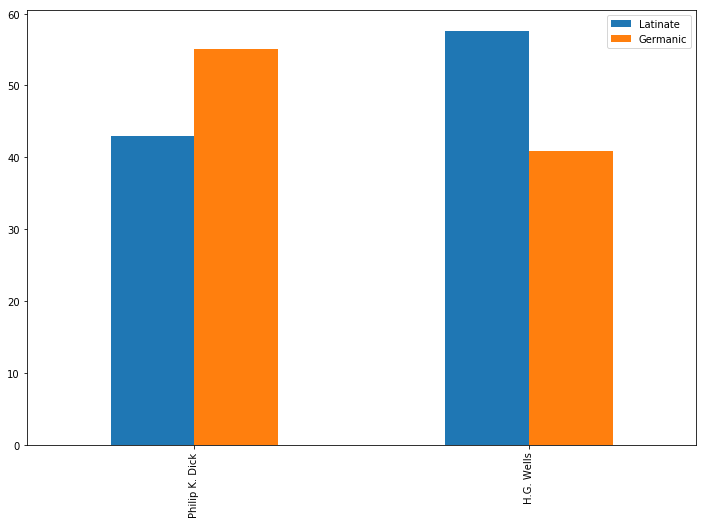

In [23]:
df[['Latinate', 'Germanic']].plot(kind='bar', figsize=(12,8))

# Etymological Differences
I think this clear difference between the etymology of the wordchoices of Philip K Dick and H.G. Wells implies some interesting linguistical differences. For both authors, Germanic & Latinate derived words take up nearly 98% of their respective corpus' macro-etymology, however, the differences between the distribution of these two word-families is very telling. As an American writer, Dick's use of Germanic words make's sense considering a more English focused, and thus Germanic, lexicon. However, as an English writer who was also a noted polyglot, H.G. Wells' shows much more Latinate influence, which I surmise is due to French/Spanish/Italian influences. 

Because English contains so many loan words from other languages, the differences in vocabulary between these two authors can be clearly seen to be correlated with their geography. Wells not only has much more Romantic influences in his vocabulary, but also a wider range of European micro-influences, as seen with in the categories of the etymology dataframe. Wells' corpus has slight etymological influences from Celtic and Austronesian language families that are missing in Dick's corpus. On the other hand, Dick's corpus also has a higher etymology quotient of middle-eastern language families such as Indo-Iranian and Turkic. I am unsure if this is due to a personal interest in these languages, or whether its a broader effect due to globalisation and a strange fetishization of eastern culture and languages during the "hippie era" of the 60s and early 70s during which Dick produced his most famous works.

# Concluding Thoughts

I think the differences between these two authors, both in terms of etymology and stylometry, implies a clear contrast between the writings and word-choice of American and English sci-fi authors. However, because of the limited scope of this project's corpora and due to unescapable biases in the corpora in terms of the chronological gap of the authors and the style of works therein, it is difficult to pinpoint in terms of casaulity how many of these differences are due to geography versus confounding factors. However, I think that the pulp genre of American sci-fi created a sort of (slightly) permeable bubble of writing styles among American authors that didn't exist in Europe, with American authors frequently mimicing the style and subjects of their pulp counterparts. Additionally, the raw popularity of the American pulp genre and its influences on the later, more serious novelists that emerged out of the rubble of the genre in the late 50s (such as Heinlein, Guin, and Dick) completely overwhelmed European authors in terms of worldwide readership. Thus, though the large difference in time between the writings of Wells' and Dick is undoubtedly a confounding factor, I found that the transition of geographical dominance of the genre from English to American necessitated that I choose Dick's European counterpart to be before the arrival of the American pulp genre.



# Works Cited
1. “Biography.” Philip K. Dick, www.philipdick.com/biography/.
2. Nicholson, Norman Cornthwaite. “H.G. Wells.” Encyclopædia Britannica, Encyclopædia Britannica, Inc., 20 July 1998, www.britannica.com/biography/H-G-Wells.
3. Sterling, Bruce. “Science Fiction.” Encyclopædia Britannica, Encyclopædia Britannica, Inc., 20 July 1998, www.britannica.com/art/science-fiction.
4. Gramuglia, Anthony. “History of Science Fiction Part I.” Futurism, 18 May 2017, www.futurism.media/history-of-science-fiction-part-i.


